# Comparing iSWEEP, ImaGene, and CLUES2

This notebook concerns a main figure and a supplementary figure.

Here we plot the empirical distribution of point estimates from ImaGene, CLUES, and iSWEEP.

Note that the data is not available in this repo, so the `pd.read_csv()` will throw an error. 

To reproduce, you can create the data following the pipelines.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
plt.rc('font',size=14)

### Loading and manipulating data

We do some sloppy coding to get equal bins of (selection coefficient, allele frequency)

In [2]:
table2 = pd.read_csv('imagene.cross.tsv',sep='\t',header=None)
columns = ['freq','selcoef','ne','ne2','unscaledargmax','argmax','unscaledavg','avg','uhdi1','hdi1','uhdi2','hdi2']
table2.columns = columns
table2=table2[table2['ne']!='.']
for c in columns:
    table2[c]=table2[c].astype('float')

tablepostmean = table2[['freq','selcoef','avg']]
tablepostmean['method'] = 'ImaGene'
tablepostmean.columns=['freq','selcoef','estim','method']

tablepostmean

/tmp/ipykernel_55514/530645421.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tablepostmean['method'] = 'ImaGene'


,freq,selcoef,estim,method
0,0.3334,0.040,0.027542,ImaGene
1,0.3278,0.040,0.026694,ImaGene
2,0.3348,0.040,0.027901,ImaGene
3,0.6198,0.040,0.034508,ImaGene
4,0.4908,0.040,0.030018,ImaGene
...,...,...,...,...
1767,0.3488,0.015,0.027468,ImaGene
1768,0.1927,0.015,0.031131,ImaGene
1769,0.1312,0.015,0.030284,ImaGene
1770,0.1718,0.015,0.028725,ImaGene


In [3]:
tableclues = pd.read_csv('clues2.final.txt',sep='\t',header=None)
tableclues = tableclues[tableclues[1]!=np.inf]
tableclues[7] = tableclues[4]/2
tableclues[8] = 'CLUES2'
tableclues = tableclues[[6,5,7,8]]
tableclues.columns = ['freq','selcoef','estim','method']
tableclues

,freq,selcoef,estim,method
0,0.3334,0.040,0.009155,CLUES2
1,0.3278,0.040,0.007440,CLUES2
2,0.3348,0.040,0.009875,CLUES2
4,0.4908,0.040,0.006555,CLUES2
6,0.3041,0.040,-0.009370,CLUES2
...,...,...,...,...
1701,0.3842,0.015,0.007395,CLUES2
1702,0.3104,0.015,-0.008435,CLUES2
1703,0.1146,0.015,-0.014125,CLUES2
1704,0.3227,0.015,-0.002550,CLUES2


In [4]:
table = pd.read_csv('fixed.loc.final.tsv',sep='\t',header=None)
table=table[table[6]!='0.015']
table = table[table[6]=='infloc']
table = table[[0,8,2]]
table.columns = ['freq','selcoef','estim']
table = table[table['estim']!='.']
for col in list(table.columns):
    table[col] = table[col].astype(float)
table['method']='iSWEEP'
table.reset_index(inplace=True,drop=True)
table

,freq,selcoef,estim,method
0,0.1005,0.035,0.032452,iSWEEP
1,0.3122,0.035,0.036389,iSWEEP
2,0.4744,0.035,0.034894,iSWEEP
3,0.1623,0.035,0.042455,iSWEEP
4,0.2328,0.035,0.036149,iSWEEP
...,...,...,...,...
1755,0.8560,0.040,0.036947,iSWEEP
1756,0.7974,0.040,0.039900,iSWEEP
1757,0.1195,0.040,0.043238,iSWEEP
1758,0.6612,0.040,0.040043,iSWEEP


In [5]:
binvalues=[0.1,0.3,0.5,0.7,0.9]
table['freqbins'] = pd.cut(table['freq'],bins=binvalues,labels=['(0.1, 0.3]','(0.3, 0.5]','(0.5, 0.7]','(0.7, 0.9]'])
tablepostmean['freqbins'] = pd.cut(tablepostmean['freq'],bins=binvalues,labels=['(0.1, 0.3]','(0.3, 0.5]','(0.5, 0.7]','(0.7, 0.9]'])
tableclues['freqbins'] = pd.cut(tableclues['freq'],bins=binvalues,labels=['(0.1, 0.3]','(0.3, 0.5]','(0.5, 0.7]','(0.7, 0.9]'])
tableclues['freqbins'].value_counts()

/tmp/ipykernel_55514/1457776626.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tablepostmean['freqbins'] = pd.cut(tablepostmean['freq'],bins=binvalues,labels=['(0.1, 0.3]','(0.3, 0.5]','(0.5, 0.7]','(0.7, 0.9]'])


freqbins
(0.1, 0.3]    615
(0.3, 0.5]    408
(0.5, 0.7]    189
(0.7, 0.9]    169
Name: count, dtype: int64

In [6]:
mx1 = 50
mx2 = 20
freqlabels = ['(0.1, 0.3]','(0.3, 0.5]','(0.5, 0.7]','(0.7, 0.9]']
selcoeflabels = [0.015,0.02,0.025,0.03,0.035,0.04]

tups1 = [('(0.1, 0.3]',s) for s in selcoeflabels]
tups2 = [('(0.3, 0.5]',s) for s in selcoeflabels]
tups3 = [('(0.5, 0.7]',s) for s in selcoeflabels]
tups4 = [('(0.7, 0.9]',s) for s in selcoeflabels]
tups = tups1 + tups2 + tups3 + tups4

In [7]:
# first subtable
first = tups[0]
temptable = table
reducedtable = temptable[(temptable['selcoef']==first[1])&(temptable['freqbins']==first[0])][:mx1]

for t in tups[1:]:
    subtable = temptable[(temptable['selcoef']==t[1])&(temptable['freqbins']==t[0])]
    try:
        subtable=subtable[:mx1]
    except:
        subtable=subtable[:mx2]
    reducedtable = pd.concat((reducedtable,subtable))
reducedtable.reset_index(inplace=True)
reducedtable1 = reducedtable

# second subtable
first = tups[0]
temptable = tablepostmean
reducedtable = temptable[(temptable['selcoef']==first[1])&(temptable['freqbins']==first[0])][:mx1]

for t in tups[1:]:
    subtable = temptable[(temptable['selcoef']==t[1])&(temptable['freqbins']==t[0])]
    try:
        subtable=subtable[:mx1]
    except:
        subtable=subtable[:mx2]
    reducedtable = pd.concat((reducedtable,subtable))
reducedtable.reset_index(inplace=True)
reducedtable2 = reducedtable

# third subtable
first = tups[0]
temptable = tableclues
reducedtable = temptable[(temptable['selcoef']==first[1])&(temptable['freqbins']==first[0])][:mx1]

for t in tups[1:]:
    subtable = temptable[(temptable['selcoef']==t[1])&(temptable['freqbins']==t[0])]
    try:
        subtable=subtable[:mx1]
    except:
        subtable=subtable[:mx2]
    reducedtable = pd.concat((reducedtable,subtable))
reducedtable.reset_index(inplace=True)
reducedtable3 = reducedtable

In [8]:
maintable=pd.concat((reducedtable2,reducedtable1,reducedtable3))
maintable=maintable[['freq','selcoef','estim','method','freqbins']]
maintable.reset_index(inplace=True,drop=True)
maintable.head()

,freq,selcoef,estim,method,freqbins
0,0.1003,0.015,0.032110,ImaGene,"(0.1, 0.3]"
1,0.1269,0.015,0.025560,ImaGene,"(0.1, 0.3]"
2,0.1356,0.015,0.029189,ImaGene,"(0.1, 0.3]"
3,0.1303,0.015,0.026904,ImaGene,"(0.1, 0.3]"
4,0.1156,0.015,0.031600,ImaGene,"(0.1, 0.3]"


## A main figure in paper

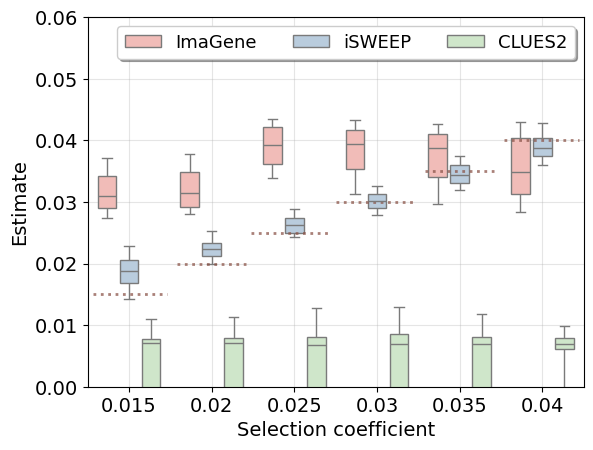

In [118]:
sns.boxplot(maintable,
              x='selcoef',
              y='estim',
              hue='method',
              palette='Pastel1',
            whis=[10,90],
            showfliers=False,
            gap=0.15,
            width=0.8,
            fliersize=0.5,
             )
plt.ylim(0.,0.06)
plt.grid(alpha=0.33)
plt.legend(ncol=3,fontsize=13,frameon=True,shadow=True)
plt.xlabel('Selection coefficient')
plt.ylabel('Estimate')

plt.axhline(0.035,0.68,0.82,color='tab:brown',linewidth=2,alpha=0.75,linestyle='dotted')
plt.axhline(0.04,0.84,0.99,color='tab:brown',linewidth=2,alpha=0.75,linestyle='dotted')
plt.axhline(0.03,0.5,0.66,color='tab:brown',linewidth=2,alpha=0.75,linestyle='dotted')
plt.axhline(0.025,0.33,0.49,color='tab:brown',linewidth=2,alpha=0.75,linestyle='dotted')
plt.axhline(0.02,0.18,0.32,color='tab:brown',linewidth=2,alpha=0.75,linestyle='dotted')
plt.axhline(0.015,0.01,0.16,color='tab:brown',linewidth=2,alpha=0.75,linestyle='dotted')

## Strip plot version of the figure

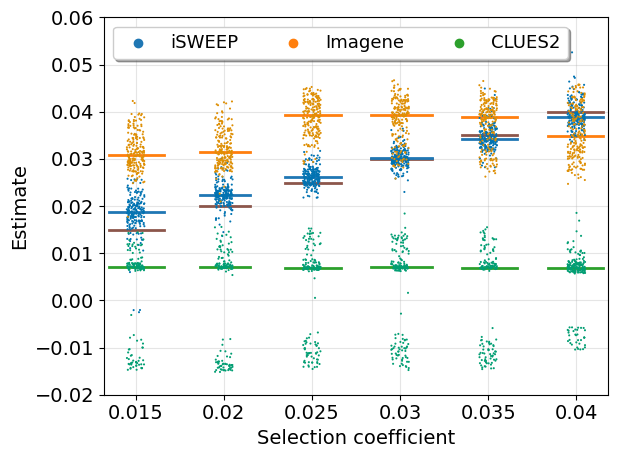

In [13]:
maintable2 = pd.concat((reducedtable1,reducedtable2,reducedtable3))
sns.stripplot(maintable2,
              x='selcoef',
              y='estim',
              hue='method',
              palette='colorblind',
              s=1.5,
              legend=False
             )
plt.ylim(-0.02,0.06)
plt.grid(alpha=0.33)


plt.scatter(-0.03,-0.03,label='iSWEEP',color='tab:blue')
plt.scatter(-0.03,-0.03,label='Imagene',color='tab:orange')
plt.scatter(-0.03,-0.03,label='CLUES2',color='tab:green')

plt.legend(ncol=3,fontsize=13,frameon=True,shadow=True)
plt.xlabel('Selection coefficient')
plt.ylabel('Estimate')

plt.axhline(0.035,0.71,0.82,color='tab:brown',linewidth=2,alpha=1.,linestyle='solid')
plt.axhline(0.04,0.88,0.99,color='tab:brown',linewidth=2,alpha=1.,linestyle='solid')
plt.axhline(0.03,0.53,0.65,color='tab:brown',linewidth=2,alpha=1.,linestyle='solid')
plt.axhline(0.025,0.36,0.47,color='tab:brown',linewidth=2,alpha=1.,linestyle='solid')
plt.axhline(0.02,0.19,0.29,color='tab:brown',linewidth=2,alpha=1.,linestyle='solid')
plt.axhline(0.015,0.01,0.12,color='tab:brown',linewidth=2,alpha=1.,linestyle='solid')


plt.axhline(reducedtable1[reducedtable1['selcoef']==0.035]['estim'].quantile(0.5),0.71,0.82,color='tab:blue',linewidth=2,alpha=1.,linestyle='solid')
plt.axhline(reducedtable1[reducedtable1['selcoef']==0.04]['estim'].quantile(0.5),0.88,0.99,color='tab:blue',linewidth=2,alpha=1.,linestyle='solid')
plt.axhline(reducedtable1[reducedtable1['selcoef']==0.03]['estim'].quantile(0.5),0.53,0.65,color='tab:blue',linewidth=2,alpha=1.,linestyle='solid')
plt.axhline(reducedtable1[reducedtable1['selcoef']==0.025]['estim'].quantile(0.5),0.36,0.47,color='tab:blue',linewidth=2,alpha=1.,linestyle='solid')
plt.axhline(reducedtable1[reducedtable1['selcoef']==0.02]['estim'].quantile(0.5),0.19,0.29,color='tab:blue',linewidth=2,alpha=1.,linestyle='solid')
plt.axhline(reducedtable1[reducedtable1['selcoef']==0.015]['estim'].quantile(0.5),0.01,0.12,color='tab:blue',linewidth=2,alpha=1.,linestyle='solid')


plt.axhline(reducedtable2[reducedtable2['selcoef']==0.035]['estim'].quantile(0.5),0.71,0.82,color='tab:orange',linewidth=2,alpha=1.,linestyle='solid')
plt.axhline(reducedtable2[reducedtable2['selcoef']==0.04]['estim'].quantile(0.5),0.88,0.99,color='tab:orange',linewidth=2,alpha=1.,linestyle='solid')
plt.axhline(reducedtable2[reducedtable2['selcoef']==0.03]['estim'].quantile(0.5),0.53,0.65,color='tab:orange',linewidth=2,alpha=1.,linestyle='solid')
plt.axhline(reducedtable2[reducedtable2['selcoef']==0.025]['estim'].quantile(0.5),0.36,0.47,color='tab:orange',linewidth=2,alpha=1.,linestyle='solid')
plt.axhline(reducedtable2[reducedtable2['selcoef']==0.02]['estim'].quantile(0.5),0.19,0.29,color='tab:orange',linewidth=2,alpha=1.,linestyle='solid')
plt.axhline(reducedtable2[reducedtable2['selcoef']==0.015]['estim'].quantile(0.5),0.01,0.12,color='tab:orange',linewidth=2,alpha=1.,linestyle='solid')

plt.axhline(reducedtable3[reducedtable3['selcoef']==0.035]['estim'].quantile(0.5),0.71,0.82,color='tab:green',linewidth=2,alpha=1.,linestyle='solid')
plt.axhline(reducedtable3[reducedtable3['selcoef']==0.04]['estim'].quantile(0.5),0.88,0.99,color='tab:green',linewidth=2,alpha=1.,linestyle='solid')
plt.axhline(reducedtable3[reducedtable3['selcoef']==0.03]['estim'].quantile(0.5),0.53,0.65,color='tab:green',linewidth=2,alpha=1.,linestyle='solid')
plt.axhline(reducedtable3[reducedtable3['selcoef']==0.025]['estim'].quantile(0.5),0.36,0.47,color='tab:green',linewidth=2,alpha=1.,linestyle='solid')
plt.axhline(reducedtable3[reducedtable3['selcoef']==0.02]['estim'].quantile(0.5),0.19,0.29,color='tab:green',linewidth=2,alpha=1.,linestyle='solid')
plt.axhline(reducedtable3[reducedtable3['selcoef']==0.015]['estim'].quantile(0.5),0.01,0.12,color='tab:green',linewidth=2,alpha=1.,linestyle='solid')

plt.tight_layout()

## Distribution of point estimates

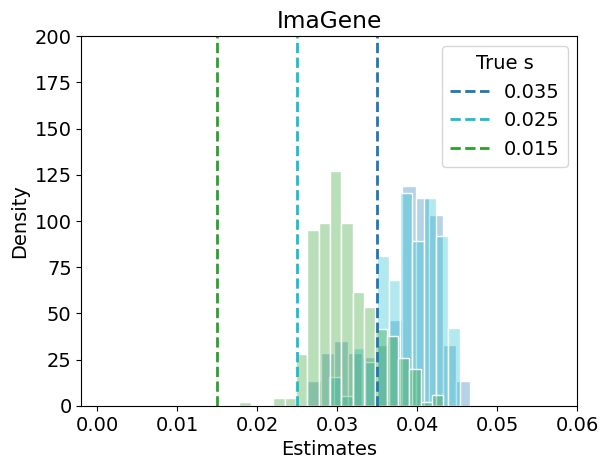

In [183]:
color1 = 'tab:blue'
color2 = 'tab:cyan'
color3 = 'tab:green'


truth = 0.035
subtable = tablepostmean
subtable = subtable[subtable['selcoef']==truth]
sns.histplot(
    subtable,
    x='estim',
    # stat='probability',
    stat='density',
    alpha=0.33,
    edgecolor='1.',
    color=color1,
)
# sns.kdeplot(
#     subtable,
#     x='estim',
#     linewidth=3,
#     color=color1,
#     # common_norm=True,
# )
plt.axvline(truth,color=color1,linewidth=2,linestyle='--',label='0.035')

truth = 0.025
subtable = tablepostmean
subtable = subtable[subtable['selcoef']==truth]
sns.histplot(
    subtable,
    x='estim',
    # stat='probability',
    stat='density',
    # discrete=True,
    alpha=0.33,
    edgecolor='1.',
    color=color2,
)
# sns.kdeplot(
#     subtable,
#     x='estim',
#     linewidth=3,
#     color=color2,
#     # common_norm=True,
# )
plt.axvline(truth,color=color2,linewidth=2,linestyle='--',label='0.025')


truth = 0.015
subtable = tablepostmean
subtable = subtable[subtable['selcoef']==truth]
sns.histplot(
    subtable,
    x='estim',
    # stat='probability',
    stat='density',
    # discrete=True,
    alpha=0.33,
    edgecolor='1.',
    color=color3,
)
# sns.kdeplot(
#     subtable,
#     x='estim',
#     linewidth=3,
#     color=color3,
#     # common_norm=True,
# )
plt.axvline(truth,color=color3,linewidth=2,linestyle='--',label='0.015')

plt.xlim(-0.002,0.06)

# plt.grid(alpha=0.33)

plt.ylim(0,200)

plt.xlabel('Estimates')

plt.title('ImaGene')

plt.legend(title='True s')

plt.savefig('imagene.hist.png')
plt.savefig('imagene.hist.tiff')
plt.savefig('imagene.hist.jpg')

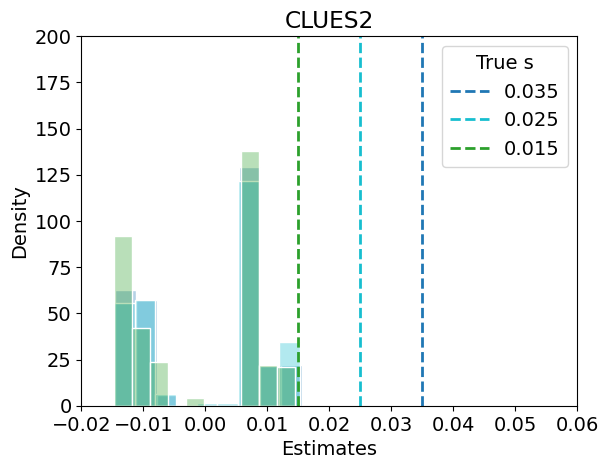

In [182]:
color1 = 'tab:blue'
color2 = 'tab:cyan'
color3 = 'tab:green'


truth = 0.035
subtable = tableclues
subtable = subtable[subtable['selcoef']==truth]
sns.histplot(
    subtable,
    x='estim',
    # stat='probability',
    stat='density',
    alpha=0.33,
    edgecolor='1.',
    color=color1,
)
# sns.kdeplot(
#     subtable,
#     x='estim',
#     linewidth=3,
#     color=color1,
#     # common_norm=True,
# )
plt.axvline(truth,color=color1,linewidth=2,linestyle='--',label='0.035')

truth = 0.025
subtable = tableclues
subtable = subtable[subtable['selcoef']==truth]
sns.histplot(
    subtable,
    x='estim',
    # stat='probability',
    stat='density',
    # discrete=True,
    alpha=0.33,
    edgecolor='1.',
    color=color2,
)
# sns.kdeplot(
#     subtable,
#     x='estim',
#     linewidth=3,
#     color=color2,
#     # common_norm=True,
# )
plt.axvline(truth,color=color2,linewidth=2,linestyle='--',label='0.025')


truth = 0.015
subtable = tableclues
subtable = subtable[subtable['selcoef']==truth]
sns.histplot(
    subtable,
    x='estim',
    # stat='probability',
    stat='density',
    # discrete=True,
    alpha=0.33,
    edgecolor='1.',
    color=color3,
)
# sns.kdeplot(
#     subtable,
#     x='estim',
#     linewidth=3,
#     color=color3,
#     # common_norm=True,
# )
plt.axvline(truth,color=color3,linewidth=2,linestyle='--',label='0.015')

plt.xlim(-0.02,0.06)

# plt.grid(alpha=0.33)

plt.ylim(0,200)

plt.xlabel('Estimates')

plt.title('CLUES2')

plt.legend(title='True s')
plt.savefig('clues2.hist.png')
plt.savefig('clues2.hist.tiff')
plt.savefig('clues2.hist.jpg')

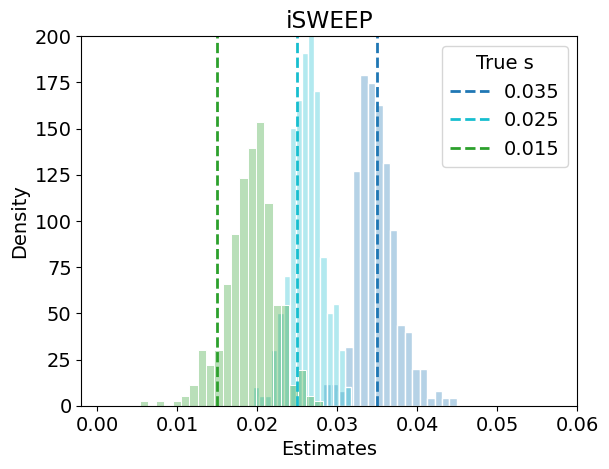

In [181]:
color1 = 'tab:blue'
color2 = 'tab:cyan'
color3 = 'tab:green'


truth = 0.035
subtable = table
subtable = subtable[subtable['selcoef']==truth]
sns.histplot(
    subtable,
    x='estim',
    # stat='probability',
    stat='density',
    alpha=0.33,
    edgecolor='1.',
    color=color1,
)
# sns.kdeplot(
#     subtable,
#     x='estim',
#     linewidth=3,
#     color=color1,
#     # common_norm=True,
# )
plt.axvline(truth,color=color1,linewidth=2,linestyle='--',label='0.035')

truth = 0.025
subtable = table
subtable = subtable[subtable['selcoef']==truth]
sns.histplot(
    subtable,
    x='estim',
    # stat='probability',
    stat='density',
    # discrete=True,
    alpha=0.33,
    edgecolor='1.',
    color=color2,
)
# sns.kdeplot(
#     subtable,
#     x='estim',
#     linewidth=3,
#     color=color2,
#     # common_norm=True,
# )
plt.axvline(truth,color=color2,linewidth=2,linestyle='--',label='0.025')


truth = 0.015
subtable = table
subtable = subtable[subtable['selcoef']==truth]
sns.histplot(
    subtable,
    x='estim',
    # stat='probability',
    stat='density',
    # discrete=True,
    alpha=0.33,
    edgecolor='1.',
    color=color3,
)
# sns.kdeplot(
#     subtable,
#     x='estim',
#     linewidth=3,
#     color=color3,
#     # common_norm=True,
# )
plt.axvline(truth,color=color3,linewidth=2,linestyle='--',label='0.015')

plt.xlim(-0.002,0.06)

# plt.grid(alpha=0.33)

plt.ylim(0,200)

plt.xlabel('Estimates')

plt.title('iSWEEP')

plt.legend(title='True s')

plt.savefig('isweep.hist.png')
plt.savefig('isweep.hist.tiff')
plt.savefig('isweep.hist.jpg')